In [1]:
import pandas as pd
import io
import requests
import numpy as np

# Data Wrangling

## Import Position Data

In [20]:
#Import Positions
url="https://info0.s3.us-east-2.amazonaws.com/recruitment/positions.csv"
df_position=pd.read_csv("https://info0.s3.us-east-2.amazonaws.com/recruitment/positions.csv")

In [21]:
df_position.head(10)

,user_id,jobtitle,startdate,enddate
0,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,delivery_driver,2005-03-01,2012-07-01
1,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,ledelsesudvikling_coaching_og_psykisk_arbejdsm...,2014-04-01,2018-01-01
2,Cazq5pI2ol+qKuHNY0fSUw5+2cvffV/mNepQVJd0smgtpB...,project_technician,2012-06-01,2012-09-01
3,4qPM2d6reWpNwSQJ3NSQVw5+2cvffV/mNepQVJd0smgtpB...,telesales,2014-08-01,2015-03-01
4,0k6KOTrEedq2/2VzvQ6D8Q5+2cvffV/mNepQVJd0smgtpB...,mortgage_consultant,1990-08-01,1995-12-01
5,efMt7IXinLRh9q75rXkg2rE8KztNWz3qNepQVJd0smgtpB...,assistant_manager,2014-06-01,2015-01-01
6,RjRgnH2/VOcPOAH3g9VUEXAG1BvSkUYANepQVJd0smgtpB...,dailies_clerk,2002-01-01,2004-01-01
7,xEXLaRB77bYr6WgJzaUQ2w5+2cvffV/mNepQVJd0smgtpB...,dept_comercial_gestión_de_traslados_privados_c...,2013-05-01,NaN
8,1XrNKHDAWzbX4lL5m0C8YA5+2cvffV/mNepQVJd0smgtpB...,monitor,2017-01-01,NaN
9,7+e+z4kCuWYcny2IeT8dFnAG1BvSkUYANepQVJd0smgtpB...,senior_vice_president,NaN,NaN


In [22]:
df_position.shape

(377585, 4)

In [23]:
np.sum(df_position.isna())

user_id           0
jobtitle       1449
startdate      9059
enddate      107231
dtype: int64

In [24]:
#Drop rows where jobtitile,startdate and enddate is missing.
df_position=df_position.dropna(subset=['startdate','enddate'],how='all')

In [25]:
df_position

,user_id,jobtitle,startdate,enddate
0,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,delivery_driver,2005-03-01,2012-07-01
1,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,ledelsesudvikling_coaching_og_psykisk_arbejdsm...,2014-04-01,2018-01-01
2,Cazq5pI2ol+qKuHNY0fSUw5+2cvffV/mNepQVJd0smgtpB...,project_technician,2012-06-01,2012-09-01
3,4qPM2d6reWpNwSQJ3NSQVw5+2cvffV/mNepQVJd0smgtpB...,telesales,2014-08-01,2015-03-01
4,0k6KOTrEedq2/2VzvQ6D8Q5+2cvffV/mNepQVJd0smgtpB...,mortgage_consultant,1990-08-01,1995-12-01
...,...,...,...,...
377580,vxU1qJyHb2gVbsEWViOpxzr+/k0/DTn/+K+fv+DIJSUQ20...,senior_technical_lead_|_information_technology...,2016-01-01,2017-08-01
377581,z4kOplYyJGBhbalIOi394nAG1BvSkUYANepQVJd0smgtpB...,sr_software_test_engineer_|_information_techno...,2006-10-01,2010-06-01
377582,+TxsWIH6AJDd9axCsVyrVnAG1BvSkUYANepQVJd0smgtpB...,technical_lead,2010-11-01,2017-07-01
377583,FDyRxqAHag1OKApMgaEwKA5+2cvffV/mNepQVJd0smgtpB...,senior_software_engineer_|_information_technol...,2017-01-01,NaN


In [26]:
np.sum(df_position.isna())

user_id          0
jobtitle      1277
startdate       49
enddate      98221
dtype: int64

In [27]:
df_position

,user_id,jobtitle,startdate,enddate
0,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,delivery_driver,2005-03-01,2012-07-01
1,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,ledelsesudvikling_coaching_og_psykisk_arbejdsm...,2014-04-01,2018-01-01
2,Cazq5pI2ol+qKuHNY0fSUw5+2cvffV/mNepQVJd0smgtpB...,project_technician,2012-06-01,2012-09-01
3,4qPM2d6reWpNwSQJ3NSQVw5+2cvffV/mNepQVJd0smgtpB...,telesales,2014-08-01,2015-03-01
4,0k6KOTrEedq2/2VzvQ6D8Q5+2cvffV/mNepQVJd0smgtpB...,mortgage_consultant,1990-08-01,1995-12-01
...,...,...,...,...
377580,vxU1qJyHb2gVbsEWViOpxzr+/k0/DTn/+K+fv+DIJSUQ20...,senior_technical_lead_|_information_technology...,2016-01-01,2017-08-01
377581,z4kOplYyJGBhbalIOi394nAG1BvSkUYANepQVJd0smgtpB...,sr_software_test_engineer_|_information_techno...,2006-10-01,2010-06-01
377582,+TxsWIH6AJDd9axCsVyrVnAG1BvSkUYANepQVJd0smgtpB...,technical_lead,2010-11-01,2017-07-01
377583,FDyRxqAHag1OKApMgaEwKA5+2cvffV/mNepQVJd0smgtpB...,senior_software_engineer_|_information_technol...,2017-01-01,NaN


## Education

In [66]:
#Import Education
url="https://info0.s3.us-east-2.amazonaws.com/recruitment/education.csv"
df_edu=pd.read_csv(url)

In [67]:
df_edu.head()

,user_id,major,startdate,enddate
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Master of Viticulture,2006-01-01,2008-01-01
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Bachelor of horticulture,2001-01-01,2005-01-01
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,WSET Level 3,2015-01-01,2015-01-01
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Graduated Diploma,2008-01-01,2009-01-01
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,Lingüística Aplicada en la Enseñanza del Inglé...,2013-01-01,2016-01-01


In [68]:
df_edu.shape

(226184, 4)

In [69]:
np.sum(df_edu.isna())

user_id          0
major        63838
startdate    28628
enddate      35526
dtype: int64

In [70]:
#Drop rows where startdate or enddate is missing.
df_edu=df_edu.dropna(subset=['startdate','enddate'],how='all')

In [71]:
np.sum(df_edu.isna())

user_id          0
major        52919
startdate     1412
enddate       8310
dtype: int64

In [72]:
#str1="Bachelor's of Tech"
#'Bach' in str1

In [73]:
"""
def mojor_clr(major):
    bach = ['b.', 'bachelor','bs','bsc','bach']
    master=['master','mba','ms','ma']
    doc=['doc','ph.','post doc']
    str = "one two three four five"
    if any(x in major.lower() for x in bach):
        return 'Bachelor'
    else:
        print ("Not a match")
"""

'\ndef mojor_clr(major):\n    bach = [\'b.\', \'bachelor\',\'bs\',\'bsc\',\'bach\']\n    master=[\'master\',\'mba\',\'ms\',\'ma\']\n    doc=[\'doc\',\'ph.\',\'post doc\']\n    str = "one two three four five"\n    if any(x in major.lower() for x in bach):\n        return \'Bachelor\'\n    else:\n        print ("Not a match")\n'

In [74]:
#Convert Major into another []
#df_edu['major'].apply()

In [75]:
df_edu['enddate']=pd.to_datetime(df_edu['enddate']).copy()
df_edu['startdate']=pd.to_datetime(df_edu['startdate']).copy()

In [76]:
df_edu['education_days']=df_edu['enddate']-df_edu['startdate'].copy()

In [77]:
#Convert days to years
df_edu['education_years']=df_edu['education_days'].dt.days//365

In [78]:
df_edu.head()

,user_id,major,startdate,enddate,education_days,education_years
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Master of Viticulture,2006-01-01,2008-01-01,730 days,2.0
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Bachelor of horticulture,2001-01-01,2005-01-01,1461 days,4.0
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,WSET Level 3,2015-01-01,2015-01-01,0 days,0.0
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Graduated Diploma,2008-01-01,2009-01-01,366 days,1.0
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,Lingüística Aplicada en la Enseñanza del Inglé...,2013-01-01,2016-01-01,1095 days,3.0


In [79]:
#Calculate total numbers of years of education completed by users.
df_edu_years=df_edu.groupby(by=["user_id"]).sum()

In [80]:
df_edu_years.head()

,education_years
user_id,
++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,4.0
++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,8.0
++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,3.0
++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,5.0
++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,2.0


In [81]:
#View Typical total years of education values.
df_edu_years.value_counts()

education_years
 4.0               15042
 5.0               11892
 6.0               10378
 3.0                7611
 8.0                7220
                   ...  
 73.0                  1
 62.0                  1
 60.0                  1
 58.0                  1
-56.0                  1
Length: 109, dtype: int64

From the above values we there are few incorrect or outlier values. Lets remove it using boxplot and IQR.

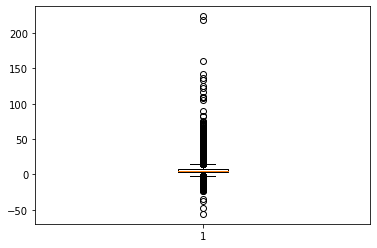

In [82]:
import matplotlib.pyplot as plt
# Creating plot
plt.boxplot(df_edu_years.education_years)
plt.show()

From the above boxplot we see that there are lot of ouliers. Lets remove it using IQR.

In [83]:
#Calculate 25th,50th and 75th percentile.
np.percentile(df_edu_years,[25,50,75])

array([4., 5., 8.])

In [84]:
#Calculate IQR , lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
IQR=8-4
lower_limit=4-1.5*IQR
upper_limit=8+1.5*IQR

In [85]:
lower_limit

-2.0

In [86]:
upper_limit

14.0

In [87]:
#Since years of education can't be less than zero. lower limit is 0.
df_edu_years=df_edu_years[df_edu_years.education_years>=0]
df_edu_years=df_edu_years[df_edu_years.education_years<=upper_limit]

In [88]:
#Les check the typical yers of education.
df_edu_years.education_years.value_counts()

4.0     15042
5.0     11892
6.0     10378
3.0      7611
8.0      7220
7.0      7081
2.0      5956
0.0      4860
10.0     3978
9.0      3857
1.0      2343
11.0     2197
12.0     2190
14.0     1215
13.0     1129
Name: education_years, dtype: int64

In [89]:
#Check our final education data
df_edu_years.head()

,education_years
user_id,
++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,4.0
++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,8.0
++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,3.0
++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,5.0
++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,2.0


In [90]:
df_edu_years.shape

(86949, 1)

## Job Title Seniority

In [91]:
#Import jobtitle_seniority
url="https://info0.s3.us-east-2.amazonaws.com/recruitment/jobtitle_seniority.csv"
df_jobtitle_senority=pd.read_csv(url)

In [92]:
df_jobtitle_senority.head()

,user_id,jobtitle,seniority
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998


In [93]:
df_jobtitle_senority.shape

(416295, 3)

In [94]:
np.sum(df_jobtitle_senority.isna())

user_id         0
jobtitle     2005
seniority       0
dtype: int64

## Merge Position and Seniority Level

In [95]:
pd.merge(df_jobtitle_senority,df_position,on=['user_id','jobtitle'],how='outer')

,user_id,jobtitle,seniority,startdate,enddate
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,NaN
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780,2013-01-01,2013-11-01
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404,1990-01-01,1996-01-01
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832,2008-09-01,2011-06-01
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,NaN
...,...,...,...,...,...
447884,JCTVICf4OMLB8+5ExhH0UA5+2cvffV/mNepQVJd0smgtpB...,mission_de_recherche_documentaire_en_cinéma_po...,NaN,2014-10-01,2014-12-01
447885,OCwWc4skdHzrbG+Ff3goAQ5+2cvffV/mNepQVJd0smgtpB...,çukurova_region_manager_|_farming,NaN,2014-10-01,NaN
447886,/q8kbGxmi5VrWb3RCGYqYw5+2cvffV/mNepQVJd0smgtpB...,intern_chief,NaN,2018-06-01,NaN
447887,rYWuo2ENnkpSiJthsVNVeg5+2cvffV/mNepQVJd0smgtpB...,academic_officer_head_central_pharmaceuticals_...,NaN,2007-10-01,2009-11-01


In [96]:
df_jobtitle_position=pd.merge(df_jobtitle_senority,df_position,on=['user_id','jobtitle'],how='outer')

In [97]:
df_jobtitle_position.head()

,user_id,jobtitle,seniority,startdate,enddate
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,NaN
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780,2013-01-01,2013-11-01
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404,1990-01-01,1996-01-01
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832,2008-09-01,2011-06-01
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,NaN


In [98]:
#Check Shape
df_jobtitle_position.shape

(447889, 5)

In [99]:
#Check Count of Missing Values
np.sum(df_jobtitle_position.isna())

user_id           0
jobtitle       2540
seniority      8805
startdate     79363
enddate      177535
dtype: int64

### Drop rows where jobtitile,startdate and enddate is missing.

In [100]:
df_jobtitle_position[df_jobtitle_position[['jobtitle','startdate','enddate']].isna().apply(lambda x: all(x), axis=1)]

,user_id,jobtitle,seniority,startdate,enddate
91173,hQ3zf+SyzbtujJmXhml+A7E8KztNWz3qNepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
91174,S76Bs9K9sWduLop2L7kYJHAG1BvSkUYANepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
91177,nZg33AJaiJveETDVOfVQNWPJk/UbaWlNNepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
91178,O/UtXrbsgViUYg64VkYVDLE8KztNWz3qNepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
91179,e/SUr1SWoMYlWK3d2M9TFXAG1BvSkUYANepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
...,...,...,...,...,...
438820,Zplm8C2GANXvVMEmK5zUUnAG1BvSkUYANepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
438821,K4sulcapUzamBK2HkAJBfXAG1BvSkUYANepQVJd0smgtpB...,NaN,4.307247,NaN,NaN
438822,ZE9x3TYkf4CBobmfgVUARA4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,4.307247,NaN,NaN
438823,sPOapJvjpb2kV6VGFUCF5rE8KztNWz3qNepQVJd0smgtpB...,NaN,4.307247,NaN,NaN


In [101]:
#Drop rows where jobtitile,startdate and enddate is missing.
df_jobtitle_position=df_jobtitle_position.dropna(subset=['jobtitle','startdate','enddate'],how='all')

In [102]:
df_jobtitle_position.shape

(446626, 5)

In [103]:
np.sum(df_jobtitle_position.isna())

user_id           0
jobtitle       1277
seniority      8805
startdate     78100
enddate      176272
dtype: int64

### Drop rows where start date is missing.

In [104]:
df_jobtitle_position=df_jobtitle_position.dropna(subset=['startdate'])

In [105]:
df_jobtitle_position.shape

(368526, 5)

In [106]:
np.sum(df_jobtitle_position.isna())

user_id          0
jobtitle      1277
seniority     8805
startdate        0
enddate      98221
dtype: int64

In [107]:
df_jobtitle_position.head()

,user_id,jobtitle,seniority,startdate,enddate
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,NaN
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780,2013-01-01,2013-11-01
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404,1990-01-01,1996-01-01
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832,2008-09-01,2011-06-01
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,NaN


### Now lets find out the users with missing End Date. Assuming this means users is currently working in this position. This may provide a good heuristic about age of the person if we include total year of education. We can not make this assumption about the users where there is no missing end date because it means either users have not updated their current role or they are retired. We will treat missing end date users as train data and users with non missing end dates as test data. 

In [108]:
np.sum(df_jobtitle_position.isna())

user_id          0
jobtitle      1277
seniority     8805
startdate        0
enddate      98221
dtype: int64

In [109]:
df_jobtitle_position[df_jobtitle_position['enddate'].isna()]

,user_id,jobtitle,seniority,startdate,enddate
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,NaN
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,NaN
6,8PIyD6H0uUaVw2xJbzOsNw4ZM3TcQvn1bQ/jHgHWG0kf/b...,inspector_contract,3.518455,2011-01-01,NaN
7,hnoZEnM4ZRQYFdCUIyyLYA5+2cvffV/mNepQVJd0smgtpB...,technical_compliance_manager_|_financial_services,5.208761,2017-11-01,NaN
10,z/zrOtw7haln9I1/X7SBrA5+2cvffV/mNepQVJd0smgtpB...,architect,6.949267,2010-09-01,NaN
...,...,...,...,...,...
447874,+337q2USs9hkiLlEsqhAvg5+2cvffV/mNepQVJd0smgtpB...,regional_sales_manager_|_financial_services,NaN,2015-11-01,NaN
447879,rYWuo2ENnkpSiJthsVNVeg5+2cvffV/mNepQVJd0smgtpB...,retail_pharmacist_|_hospital_health_care,NaN,2017-03-01,NaN
447880,HVYRooiApLViYTdkMceDCw5+2cvffV/mNepQVJd0smgtpB...,profesor_traductor_de_inglés,NaN,2014-01-01,NaN
447885,OCwWc4skdHzrbG+Ff3goAQ5+2cvffV/mNepQVJd0smgtpB...,çukurova_region_manager_|_farming,NaN,2014-10-01,NaN


In [110]:
#Get User IDs with Missing End date . This users will be our training data. Since missing end date means user is currently working in this
#position 
df_jobtitle_position[df_jobtitle_position['enddate'].isna()]['user_id'].unique()

array(['SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       '8PIyD6H0uUaVw2xJbzOsNw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==', ...,
       'cY6VXOzF255rukMLdH8unA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==',
       'ohJh/hEBI8kKox8MCm2KbA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==',
       'AyaTO5HVjAIrE+VCT3EHyA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg=='],
      dtype=object)

In [111]:
train_user_ids=df_jobtitle_position[df_jobtitle_position['enddate'].isna()]['user_id'].unique()

In [112]:
len(train_user_ids)

69486

Similarly Calculate test user IDS.

In [113]:
#Get Unique user IDs which are not in train IDs
df_jobtitle_position[~df_jobtitle_position['user_id'].isin(train_user_ids)]['user_id'].unique()

array(['jezdW1GO7A9poKrnCMLNLw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'unGg9E3H1jdMsZg+qSqB9A4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==',
       'kjYQBz5HP+/3Yt1QHljr/WEWBgzjpZvPNepQVJd0smgtpBr4MGMFJQ==', ...,
       'fnDiqbNZR1Z7kwyH1sRKg8tFfPCg/a+UNepQVJd0smgtpBr4MGMFJQ==',
       '94V+qeh06awvbcbgvgr5cg4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==',
       'OjFGVllzQUiQct4bJhv4gA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ=='],
      dtype=object)

In [114]:
test_user_ids=df_jobtitle_position[~df_jobtitle_position['user_id'].isin(train_user_ids)]['user_id'].unique()

In [115]:
len(test_user_ids)

9719

In [116]:
#Get All the unique IDs that are avilable in the data set.
len(df_jobtitle_position['user_id'].unique())

79205

In [117]:
#Sum Train and Test User IDs to check verify our calculation.Total IDs are sum of train and test IDs hence our calculation make.
# sense.
69486+9719

79205

### Asssuming missing end date means user is currently working in this position, lets replace NA with current date.

In [118]:
import datetime

In [119]:
from datetime import date
today = date.today()

In [120]:
today

datetime.date(2021, 11, 7)

In [121]:
#Check our data before imputation
df_jobtitle_position.head()

,user_id,jobtitle,seniority,startdate,enddate
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,NaN
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780,2013-01-01,2013-11-01
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404,1990-01-01,1996-01-01
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832,2008-09-01,2011-06-01
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,NaN


In [122]:
df_jobtitle_position['enddate']=df_jobtitle_position['enddate'].fillna(date.today()).copy()

In [123]:
#Check the data after date imputation
df_jobtitle_position.head()

,user_id,jobtitle,seniority,startdate,enddate
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,2021-11-07
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780,2013-01-01,2013-11-01
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404,1990-01-01,1996-01-01
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832,2008-09-01,2011-06-01
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,2021-11-07


In [124]:
#Check for Null values.
np.sum(df_jobtitle_position.isna())

user_id         0
jobtitle     1277
seniority    8805
startdate       0
enddate         0
dtype: int64

### Calculate the number of days user have spent in his/her current role.

In [125]:
df_jobtitle_position['enddate']=pd.to_datetime(df_jobtitle_position['enddate']).copy()

In [126]:
df_jobtitle_position['startdate']=pd.to_datetime(df_jobtitle_position['startdate']).copy()

In [127]:
df_jobtitle_position['days_in_current_role']=df_jobtitle_position['enddate']-df_jobtitle_position['startdate'].copy()

In [128]:
df_jobtitle_position.head()

,user_id,jobtitle,seniority,startdate,enddate,days_in_current_role
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348,2017-01-01,2021-11-07,1771 days
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780,2013-01-01,2013-11-01,304 days
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404,1990-01-01,1996-01-01,2191 days
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832,2008-09-01,2011-06-01,1003 days
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998,2000-03-01,2021-11-07,7921 days


In [129]:
#Convert Days to Years
#df_jobtitle_position['working_exp_years']=df_jobtitle_position['days_in_current_role'].dt.days//365

In [130]:
#View The Data
#df_jobtitle_position.head()

In [131]:
#df_jobtitle_position[df_jobtitle_position['days_in_current_role']>pd.Timedelta(14600,'D')]

In [132]:
#df_jobtitle_position=df_jobtitle_position[df_jobtitle_position['days_in_current_role']<pd.Timedelta(14600,'D')]

### Now lets calculate total number of days that user have worked

In [133]:
df_jobtitle_position["days_in_current_role"]=df_jobtitle_position["days_in_current_role"].dt.days

In [134]:
# GrouBy UserIds to get total number of days user have worked.
df_total_exp=df_jobtitle_position.groupby(by=["user_id"]).sum()

In [135]:
#View the data
df_total_exp.head()

,seniority,days_in_current_role
user_id,,
++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,7.064817,25147
++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,10.665753,12059
++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,34.692158,3329
++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,5.002740,822
++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,37.294685,8468


In [136]:
len(df_total_exp.index)

79205

In [137]:
df_total_exp['working_exp_years']=df_total_exp['days_in_current_role']/365

In [138]:
df_total_exp.head()

,seniority,days_in_current_role,working_exp_years
user_id,,,
++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,7.064817,25147,68.895890
++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,10.665753,12059,33.038356
++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,34.692158,3329,9.120548
++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,5.002740,822,2.252055
++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,37.294685,8468,23.200000


## Lets remove Outliers in Work Experience and Seniority levels.

In [139]:
# Check number of years to worked to see the incorrect or outlier values
df_total_exp[df_total_exp['working_exp_years']>50]

,seniority,days_in_current_role,working_exp_years
user_id,,,
++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,7.064817,25147,68.895890
++XOt+UqpCnbnNoSx+ZCYQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,13.783282,24815,67.986301
+/4Mfwaqzbpv8OhmFjPIUQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,51.870501,25378,69.528767
+/bzU/BUXuqA2cR+P3JoHQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,40.109254,23321,63.893151
+337q2USs9hkiLlEsqhAvg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,58.024050,24651,67.536986
...,...,...,...
zuA4o3mxIAHZ5Sd/mG+rH7bJBBZhf6frbQ/jHgHWG0kf/bHrn17MPg==,72.271520,34100,93.424658
zuIgtLT5m7PTI2RP0fwEYw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,13.628035,23875,65.410959
zv3GWoxtS4KjLgiJ159hmQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,27.549041,23008,63.035616


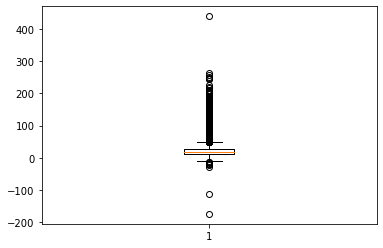

In [140]:
#See Boxplot for Outliers.
plt.boxplot(df_total_exp['working_exp_years'])
plt.show()

Hence we see that there are users with work experience greater than 60 years. These are outliers. Hecne let's do some outlier removal processing.

In [142]:
#Calculate 25th,50th and 75th percentile.
per_25,per_50,per_75=np.percentile(df_total_exp['working_exp_years'],[25,50,75])

In [143]:
#Calculate IQR, upper limit , lower limit.
IQR=per_75-per_25
upper_limit=per_75+1.5*IQR
lower_limit=per_25-1.5*IQR

In [144]:
#Drop Outliers
df_total_exp=df_total_exp[df_total_exp['working_exp_years']>=0] #Since Work Exp can't be negative
df_total_exp=df_total_exp[df_total_exp['working_exp_years']<=upper_limit]

In [145]:
#Check shape to verify if the rows are removed.
df_total_exp['working_exp_years'].shape

(75597,)

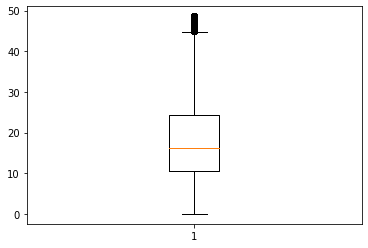

In [146]:
#See Boxplot After removing Outlier.
plt.boxplot(df_total_exp['working_exp_years'])
plt.show()

### Seniority 

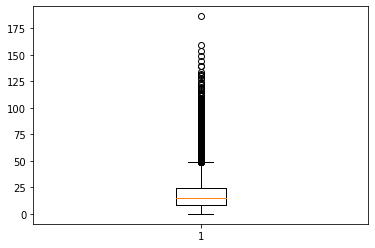

In [147]:
# CHeck if Seniority  has any outlier
plt.boxplot(df_total_exp['seniority'])
plt.show()

Hence there are few Outlier in Seniority. Let find IQR and remove outlier.

In [148]:
#Calculate 25th,50th and 75th percentile.
per_25,per_50,per_75=np.percentile(df_total_exp['seniority'],[25,50,75])

In [149]:
(per_25,per_50,per_75)


(8.495850168350168, 15.144704151622028, 24.570091324200913)

In [150]:
#Calculate IQR, upper limit , lower limit.
IQR=per_75-per_25
upper_limit=per_75+1.5*IQR
lower_limit=per_25-1.5*IQR

In [151]:
#Drop Outliers
df_total_exp=df_total_exp[df_total_exp['seniority']>=lower_limit] #Since Work Exp can't be negative
df_total_exp=df_total_exp[df_total_exp['seniority']<=upper_limit]

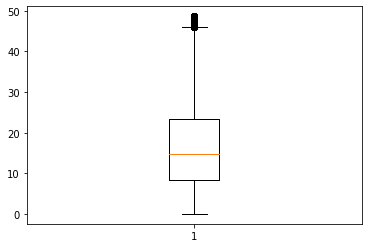

In [152]:
# Check the Boxplot after Outlier removal
plt.boxplot(df_total_exp['seniority'])
plt.show()

In [153]:
df_total_exp.head()

,seniority,days_in_current_role,working_exp_years
user_id,,,
++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,10.665753,12059,33.038356
++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,34.692158,3329,9.120548
++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,5.002740,822,2.252055
++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,37.294685,8468,23.200000
++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,14.120908,5393,14.775342


In [154]:
df_total_exp.shape

(73078, 3)

## Merge Total Experience and Senority Data with Education.

In [155]:
#Education Years Data
df_edu_years.head()

,education_years
user_id,
++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,4.0
++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,8.0
++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,3.0
++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,5.0
++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,2.0


In [156]:
#Convert UserID index to Column
df_edu_years.reset_index(inplace=True)

In [157]:
#Verify the Reset Operation.
df_edu_years.head()

,user_id,education_years
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.0
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,8.0
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,3.0
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,5.0
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,2.0


In [158]:
df_edu_years.shape

(86949, 2)

In [159]:
#Similarly reset Work Experience Data.
df_total_exp.reset_index(inplace=True)

In [160]:
#Verify the Reset Operation.
df_total_exp.head()

,user_id,seniority,days_in_current_role,working_exp_years
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,12059,33.038356
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,3329,9.120548
2,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,5.002740,822,2.252055
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,37.294685,8468,23.200000
4,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,5393,14.775342


In [161]:
df_total_exp.shape

(73078, 4)

In [162]:
#Lets Merge Education and Total Experience Data
df_all=pd.merge(df_total_exp,df_edu_years,on=['user_id'],how='inner')

In [163]:
df_all.head()

,user_id,seniority,days_in_current_role,working_exp_years,education_years
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,12059,33.038356,8.0
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,3329,9.120548,3.0
2,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,5.002740,822,2.252055,5.0
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,37.294685,8468,23.200000,2.0
4,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,5393,14.775342,5.0


In [164]:
df_all.shape

(63858, 5)

In [165]:
#Check if there is any missing values
np.sum(df_all.isna())

user_id                 0
seniority               0
days_in_current_role    0
working_exp_years       0
education_years         0
dtype: int64

## Train Test Split

In [166]:
# Get Train Data
train=df_all[df_all['user_id'].isin(train_user_ids)]

In [167]:
train.head()

,user_id,seniority,days_in_current_role,working_exp_years,education_years
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,12059,33.038356,8.0
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,3329,9.120548,3.0
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,37.294685,8468,23.200000,2.0
4,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,5393,14.775342,5.0
5,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,25.268493,2287,6.265753,6.0


In [168]:
train.shape

(55684, 5)

In [169]:
df_all['user_id'].isin(train_user_ids)

0         True
1         True
2        False
3         True
4         True
         ...  
63853     True
63854    False
63855     True
63856     True
63857     True
Name: user_id, Length: 63858, dtype: bool

In [170]:
# Get Test Data
test=df_all[df_all['user_id'].isin(test_user_ids)]

In [171]:
test.head()

,user_id,seniority,days_in_current_role,working_exp_years,education_years
2,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,5.002740,822,2.252055,5.0
13,++UVtBJpXMa1E+IOQobfrQ5+2cvffV/mNepQVJd0smgtpB...,25.901599,2558,7.008219,3.0
21,++ezojV5y6oN+zgZrWd8Rw+/8VEIFuQmbQ/jHgHWG0kf/b...,14.927184,5390,14.767123,10.0
37,+/NxmNuPQQEhv6xszCovjQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.027426,2161,5.920548,0.0
38,+/Sp4G4/k1aErLOmAoPHkA5+2cvffV/mNepQVJd0smgtpB...,3.501003,730,2.000000,2.0


In [172]:
test.shape

(8174, 5)

## Now lets calculate the labels for X_train data assuming the average age of the person at start of education is 18 years. 

In [173]:
def generate_age(row):
    random_number=np.random.normal(18, 1)
    return row['working_exp_years']+row['education_years']+random_number

In [174]:
train['age']=train.apply(generate_age,axis=1)

<ipython-input-174-eac096d52615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age']=train.apply(generate_age,axis=1)


In [175]:
#train['age']=train['working_exp_years']+train['education_years']+18

In [176]:
train[train['age']>25]

,user_id,seniority,days_in_current_role,working_exp_years,education_years,age
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,12059,33.038356,8.0,58.428763
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,3329,9.120548,3.0,29.965596
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,37.294685,8468,23.200000,2.0,45.358842
4,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,5393,14.775342,5.0,35.579407
5,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,25.268493,2287,6.265753,6.0,32.097088
...,...,...,...,...,...,...
63852,zzP74CTnQ3lKvQa4Z8m3Vw4ZM3TcQvn1bQ/jHgHWG0kf/b...,21.166360,7342,20.115068,7.0,45.344348
63853,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,22.559653,2901,7.947945,12.0,38.133356
63855,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917,6123,16.775342,5.0,39.465042
63856,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625,10903,29.871233,5.0,52.869437


In [177]:
#Get X and Y labels
#X=train[['seniority','working_exp_years','education_years']]
#y=train['age']

# Exploratory Data Analysis
Let find pattern in the data to see if there is relationship between age and other varibles.

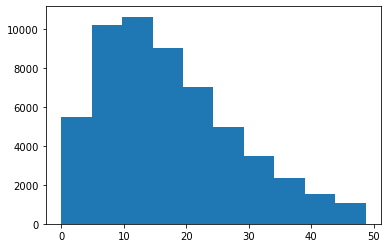

In [178]:
#Lets Visualize Distribuation of Seniority
plt.hist(train['seniority'])
plt.show()

Hence the data is right skewed. We expect most statistical models to not perform well on this data. However,tree based models are not affected by skewness.

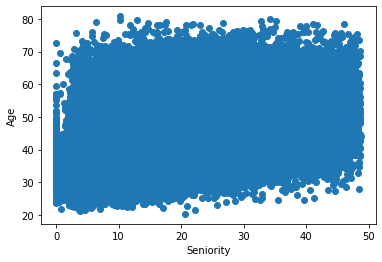

In [179]:
# Scatter plot between seniority and age to see any pattern.
plt.scatter(x=train['seniority'], y=train['age'])
plt.xlabel("Seniority")
plt.ylabel("Age")
plt.show()

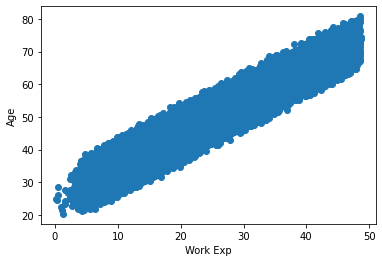

In [207]:
# Scatter plot between Work Exp and age to see any pattern.
plt.scatter(x=train['working_exp_years'], y=train['age'])
plt.xlabel("Work Exp")
plt.ylabel("Age")
plt.show()

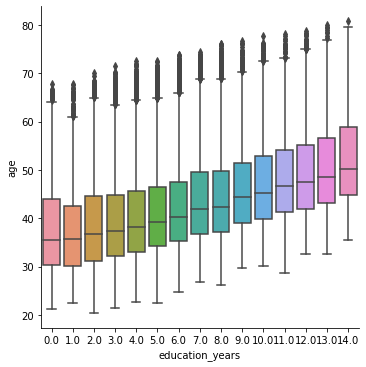

In [180]:
# Lets Visualize the relationship between Education Years and Age.
import seaborn as sns
sns.catplot(x="education_years", y="age", kind="box", data=train)
plt.show()

In [181]:
# Lets reduce to level of categories in the education_years columns as follows:
# 0-5 years= Bachelors or below level degree = Low Level Degree
# 5-12 years= Masters or Phd = Master = Mid Level Degree
# >12 years = Post Doct or equivalent degree = Higher Level Degree
train[train['education_years']<5]

,user_id,seniority,days_in_current_role,working_exp_years,education_years,age
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,3329,9.120548,3.0,29.965596
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,37.294685,8468,23.200000,2.0,45.358842
9,++P3GpkLINRrbYEiFplujg5+2cvffV/mNepQVJd0smgtpB...,19.866703,5759,15.778082,4.0,37.001852
12,++UCk5ifkH5O/0rIOu/CmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,6.088053,5546,15.194521,4.0,38.596617
15,++WZyqFWZRHYw7/i9E9vNL4xbHqlXxy8NepQVJd0smgtpB...,9.435151,4846,13.276712,3.0,35.011967
...,...,...,...,...,...,...
63835,zyEvCcxvFAaA3cuRdKq5QQ5+2cvffV/mNepQVJd0smgtpB...,18.528498,12568,34.432877,3.0,55.119639
63840,zyVtxcpbvfTqAln6wxdj5HAG1BvSkUYANepQVJd0smgtpB...,17.553183,3507,9.608219,4.0,33.904175
63842,zyYCXsnvi/tZtlqA71iJEXAG1BvSkUYANepQVJd0smgtpB...,19.506673,3597,9.854795,4.0,31.112421
63847,zz2BMqQH14Xqzav244kzbw5+2cvffV/mNepQVJd0smgtpB...,3.288025,3263,8.939726,4.0,31.270692


In [208]:
def degree_level(ed_year):
    if ed_year<5:
        return 'Low'
    elif ed_year<=12:
        return 'Mid'
    else:
        return 'High'

In [209]:
train['DegreeLevel']=train['education_years'].apply(degree_level)

<ipython-input-209-c2260dbc66e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DegreeLevel']=train['education_years'].apply(degree_level)


In [184]:
train.head()

,user_id,seniority,days_in_current_role,working_exp_years,education_years,age,DegreeLevel
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,12059,33.038356,8.0,58.428763,Mid
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,3329,9.120548,3.0,29.965596,Low
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,37.294685,8468,23.200000,2.0,45.358842,Low
4,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,5393,14.775342,5.0,35.579407,Mid
5,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,25.268493,2287,6.265753,6.0,32.097088,Mid


In [185]:
#Do Similar Operation on Test
test['DegreeLevel']=test['education_years'].apply(degree_level)

<ipython-input-185-5ac4743d81f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['DegreeLevel']=test['education_years'].apply(degree_level)


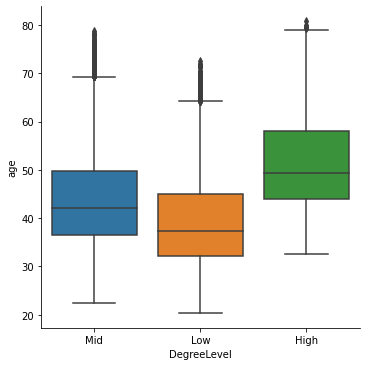

In [186]:
# Lets Visualize the relationship between Education Years and Age.
#import seaborn as sns
sns.catplot(x="DegreeLevel", y="age", kind="box", data=train)
plt.show()

In [187]:
#Check Correlation matrix.
train[["DegreeLevel",'seniority','age']].corr()

,seniority,age
seniority,1.000000,0.388661
age,0.388661,1.000000


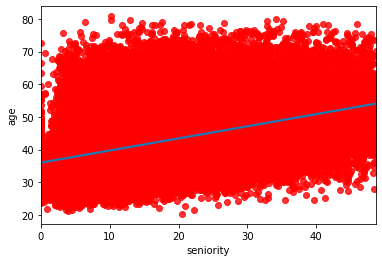

In [188]:
# create regression plot
ax = sns.regplot(x='seniority', y='age',data=train,scatter_kws={"color": 'r'},ci=95)

# Data Modelling
Lets use sklearn package to model the data using various Machine Learning Algorithms.

In [189]:
train.shape

(55684, 7)

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55684 entries, 0 to 63857
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               55684 non-null  object 
 1   seniority             55684 non-null  float64
 2   days_in_current_role  55684 non-null  int64  
 3   working_exp_years     55684 non-null  float64
 4   education_years       55684 non-null  float64
 5   age                   55684 non-null  float64
 6   DegreeLevel           55684 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.9+ MB


In [191]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [210]:
#Get X and Y labels
X=train[['seniority','DegreeLevel','working_exp_years']]
y=train['age']

In [211]:
# Train Test Split.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [212]:
X_train.head()

,seniority,DegreeLevel,working_exp_years
53572,7.355976,Mid,15.109589
23729,27.333592,Mid,24.780822
46613,8.043836,Mid,8.208219
8236,9.666135,Mid,20.030137
49653,29.626249,Mid,17.183562


In [213]:
#Transform Numerical and Categorical Columns using ColumnTransformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), ['seniority','working_exp_years']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['DegreeLevel']),
    
])

In [214]:
#Transform Numerical and Categorical Columns using ColumnTransformer
from sklearn.compose import ColumnTransformer
preprocessor_1 = ColumnTransformer(transformers=[
    #('numerical', StandardScaler(), ['seniority']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['DegreeLevel']),
    
])

## Lets use Linear Regression to Model the Data.

In [215]:
#Bulid Pipeline 
pipe = Pipeline([('preprocessor',preprocessor),('log_re', LinearRegression())])

In [216]:
#Use cross validation to fit the data
scores=cross_val_score(pipe, X_train, y_train, cv=5)
scores

array([0.96045438, 0.95964055, 0.96134538, 0.96107827, 0.95985475])

## Lets use Decision Tree

In [213]:
from sklearn.tree import DecisionTreeRegressor

In [227]:
preprocessor_tree = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(), ['seniority']),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), ['DegreeLevel']),
    
])

In [228]:
#Bulid Pipeline 
pipe_tree = Pipeline([('preprocessor',preprocessor_tree),('d_tree', DecisionTreeRegressor(max_depth=5))])

In [229]:
#Use cross validation to fit the data
scores=cross_val_score(pipe_tree, X_train, y_train, cv=5)
scores

array([0.19220516, 0.1996101 , 0.19434214, 0.20990107, 0.19106546])